<a href="https://colab.research.google.com/github/UsuarioVoltaire/Fundamentos-IA/blob/main/Ejercicio2ClasificarIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Base de datos Iris

Este es uno de los primeros conjuntos de datos utilizados en la literatura sobre métodos de clasificación y ampliamente utilizado en estadística y aprendizaje automático.  El conjunto de datos contiene 3 clases de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris.
Todo esto a partir de características de ancho y largo de pétalo y sépalo  

Se debe clasificar: clase de planta de iris.

Adicionalmente se agregan maneras de visualizar los datos

## Ejercicio:
A partir de estos datos y características entrenar un modelo de clasificación y reportar los resultados por medio de matrices de confusión, exactitud y validación cruzada (similar al notebook de clasificar vinos)


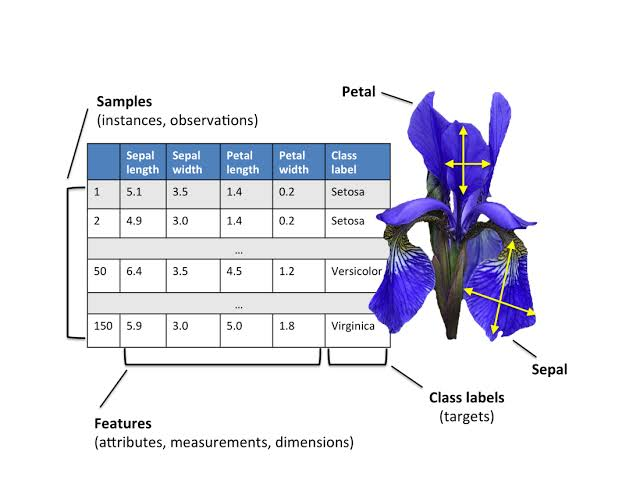

In [1]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn

**3.1.Cargue los datos iris en un data frame (pandas) e imprima la descripción de los datos (columnas y
renglones), tipo y las 10 primeras filas de los datos. Fuente de datos:**

In [20]:
## Se leen los datos
iris_data = pd.read_csv('./iris.data')

# Se agregan los nombres de las caracter´siticas
iris_data = iris_data.set_axis(['Sepal_Length', 'Sepal_Width', 'Petal_Length','Petal_Width' , 'Class'], axis=1)

# Se muestran los 10 primeros datos
print(iris_data.head(10))

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
5           4.6          3.4           1.4          0.3  Iris-setosa
6           5.0          3.4           1.5          0.2  Iris-setosa
7           4.4          2.9           1.4          0.2  Iris-setosa
8           4.9          3.1           1.5          0.1  Iris-setosa
9           5.4          3.7           1.5          0.2  Iris-setosa
   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          NaN         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3       

**3.2.Imprima las llaves y el número de filas y de columnas.**

In [12]:
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [21]:
print("Número de filas: ",len(iris_data))
print("Número de columnas: ",len(iris_data.columns))
print('Keys: ', iris_data.keys())

Número de filas:  149
Número de columnas:  5
Keys:  Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')


**3.3.Obtenga el número de muestras faltantes o Nan.**

In [22]:
cantidad_nan = iris_data.isnull().sum()
cantidad_nan_ = iris_data.isnull().sum().sum()
print(cantidad_nan)
print()
print('Cantidad de NaN: ',cantidad_nan_)


Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64

Cantidad de NaN:  0


**3.4. Muestre estadísticas básicas como percentil, media, mínimo, máximo y desviación estándar de los datos.
Use describe para ello.**

In [25]:
print(iris_data.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**3.5.Obtenga el número de muestras para cada clase.**

In [26]:
print(iris_data['Class'].value_counts())

Class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64


**3.6. Imprima las diez primeras filas y las dos primeras columnas del data frame usando los índices de las
columnas.**

In [28]:
print(iris_data.head(10))
print()
print(iris_data.iloc[0:5,0:2])

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width        Class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa
5           4.6          3.4           1.4          0.3  Iris-setosa
6           5.0          3.4           1.5          0.2  Iris-setosa
7           4.4          2.9           1.4          0.2  Iris-setosa
8           4.9          3.1           1.5          0.1  Iris-setosa
9           5.4          3.7           1.5          0.2  Iris-setosa

   Sepal_Length  Sepal_Width
0           4.9          3.0
1           4.7          3.2
2           4.6          3.1
3           5.0          3.6
4           5.4          3.9


# VISUALIZACION: Utilizando matplotlib y/o seaborn

**3.7. Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.**

      Sepal_Length
mean      5.848322
min       4.300000
max       7.900000


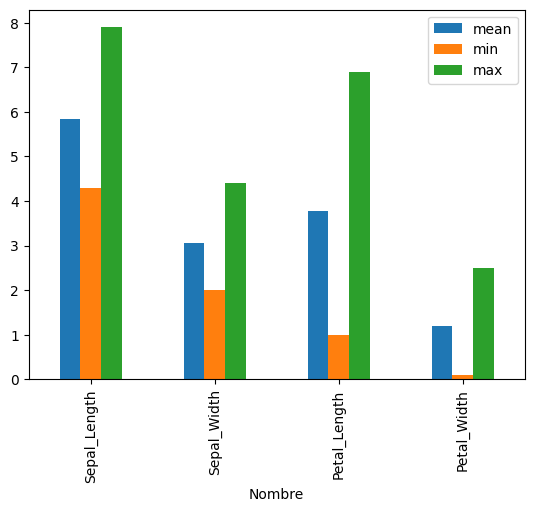

In [31]:
# Cree una gráfica de barras que muestre la media, mínimo y máximo de todos los datos.
result_sl = iris_data.agg({'Sepal_Length': ['mean', 'min', 'max']})
result_sw = iris_data.agg({'Sepal_Width': ['mean', 'min', 'max']})
result_pl = iris_data.agg({'Petal_Length': ['mean', 'min', 'max']})
result_pw = iris_data.agg({'Petal_Width': ['mean', 'min', 'max']})

print(result_sl)


df = pd.DataFrame({
    'Nombre': ['Sepal_Length', 'Sepal_Width', 'Petal_Length' , 'Petal_Width'],
    'mean': [result_sl['Sepal_Length'][0], result_sw['Sepal_Width'][0], result_pl['Petal_Length'][0], result_pw['Petal_Width'][0]],
    'min':  [result_sl['Sepal_Length'][1], result_sw['Sepal_Width'][1], result_pl['Petal_Length'][1], result_pw['Petal_Width'][1]],
    'max': [result_sl['Sepal_Length'][2], result_sw['Sepal_Width'][2], result_pl['Petal_Length'][2], result_pw['Petal_Width'][2]],
})


df.plot(x="Nombre", y=["mean", "min" , "max"], kind="bar")
plt.show()


**3.8. Muestre la frecuencia de las tres especies como una gráfica de pastel.**

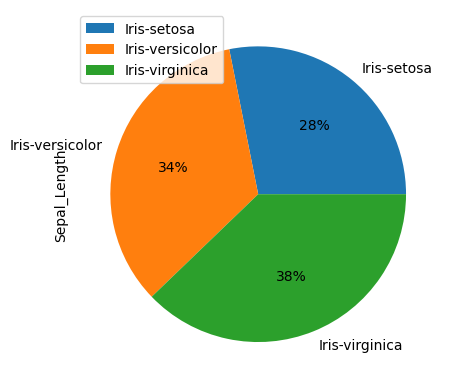

In [33]:
# # Muestre la frecuencia de las tres especies como una gráfica de pastel.
iris_data.groupby(['Class']).sum().plot(kind='pie', y='Sepal_Length' , autopct='%1.0f%%')
plt.show()


**3.9. Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies
conjuntamente.**

Iris-setosa
Iris-versicolor
Iris-virginica


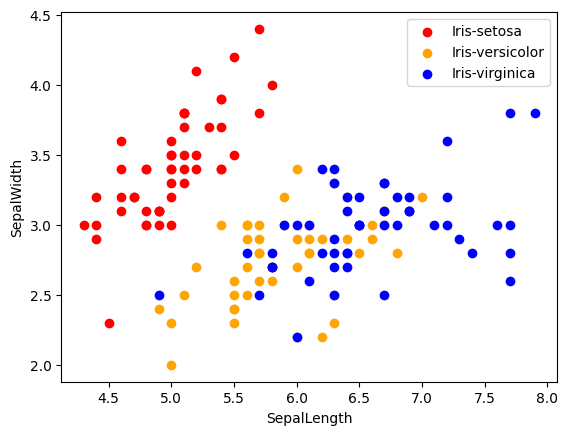

In [35]:
# Cree una gráfica que muestre la relación entre la longitud y ancho del sépalo de las tres especies conjuntamente.
#scraterplot
colors =['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x = iris_data[iris_data['Class'] == species[i]]
    print(species[i])
    plt.scatter(x['Sepal_Length'], x['Sepal_Width'], c = colors[i],label=species[i])
    plt.xlabel("SepalLength")
    plt.ylabel("SepalWidth")

plt.legend(species, loc='upper right')


**3.10. Obtenga los histogramas de las variables SepalLength, SepalWidth, PetalLength y PetalWidth.**

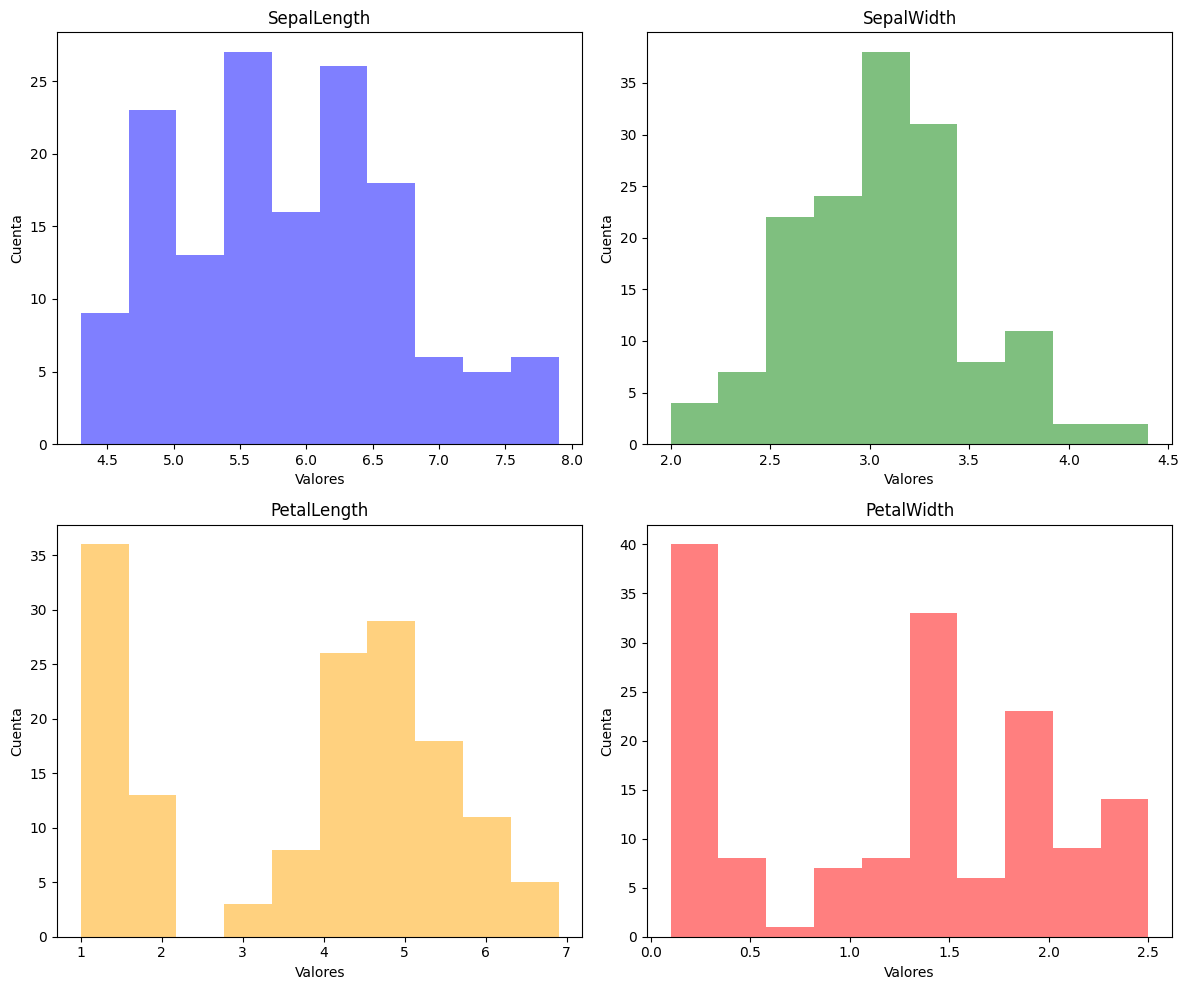

In [36]:
# Obtener datos de iris_data
x1 = iris_data['Sepal_Length']
x2 = iris_data['Sepal_Width']
x3 = iris_data['Petal_Length']
x4 = iris_data['Petal_Width']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histograma SepalLength
axs[0, 0].hist(x1, color='blue', alpha=0.5)
axs[0, 0].set_title('SepalLength')
axs[0, 0].set_xlabel('Valores')
axs[0, 0].set_ylabel('Cuenta')

# Histograma SepalWidth
axs[0, 1].hist(x2, color='green', alpha=0.5)
axs[0, 1].set_title('SepalWidth')
axs[0, 1].set_xlabel('Valores')
axs[0, 1].set_ylabel('Cuenta')

# Histograma para PetalLength
axs[1, 0].hist(x3, color='orange', alpha=0.5)
axs[1, 0].set_title('PetalLength')
axs[1, 0].set_xlabel('Valores')
axs[1, 0].set_ylabel('Cuenta')

# Histograma  PetalWidth
axs[1, 1].hist(x4, color='red', alpha=0.5)
axs[1, 1].set_title('PetalWidth')
axs[1, 1].set_xlabel('Valores')
axs[1, 1].set_ylabel('Cuenta')

plt.tight_layout()

plt.show()

**3.11. Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores las tres
especies en las gráficas de dispersión.**

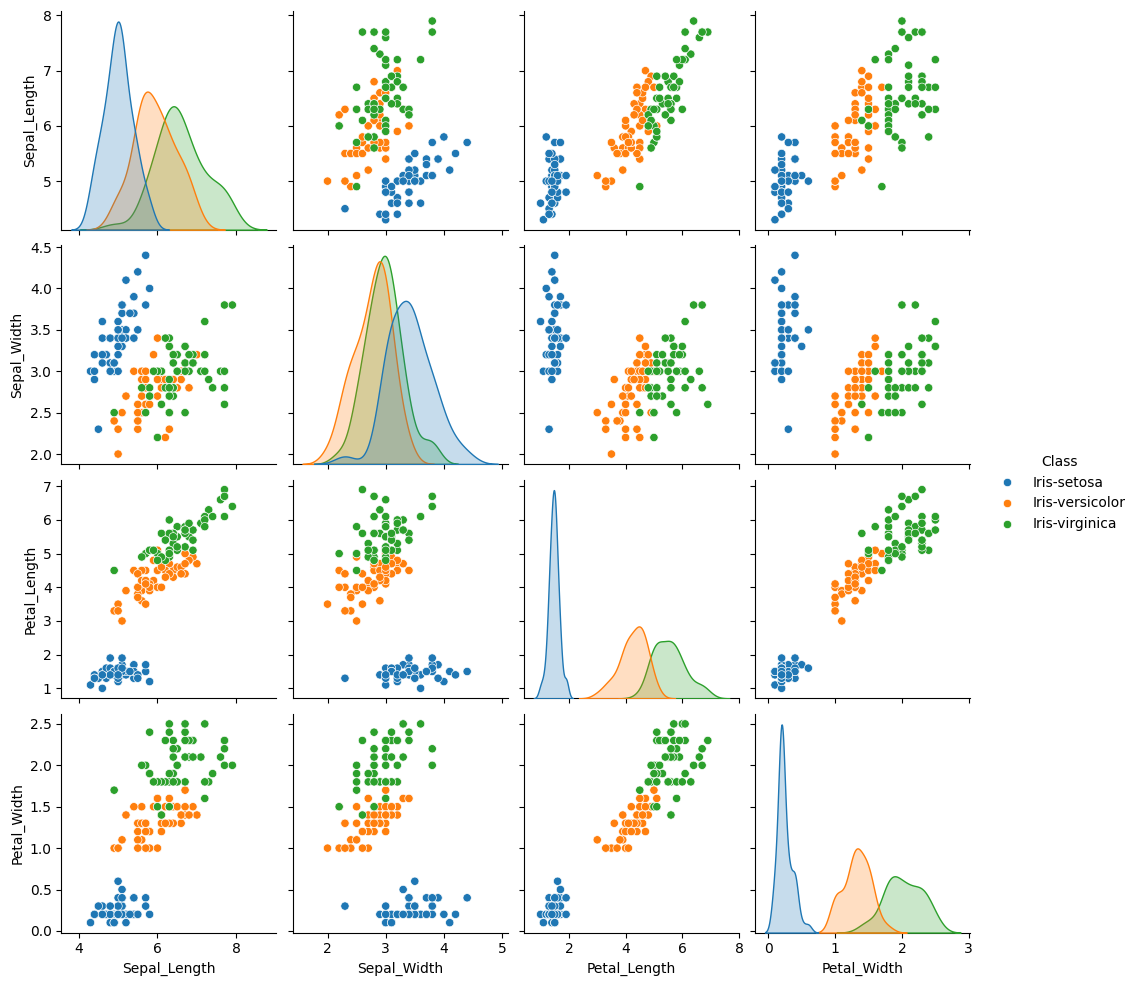

In [37]:
# Cree gráficas de dispersión usando pairplot de seaborn y muestre con distintos colores las tres especies en las gráficas de dispersión.
seaborn.pairplot(iris_data, hue ='Class')
plt.show()


**3.12. Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud y ancho
del sépalo y las distribuciones de estas dos variables.**

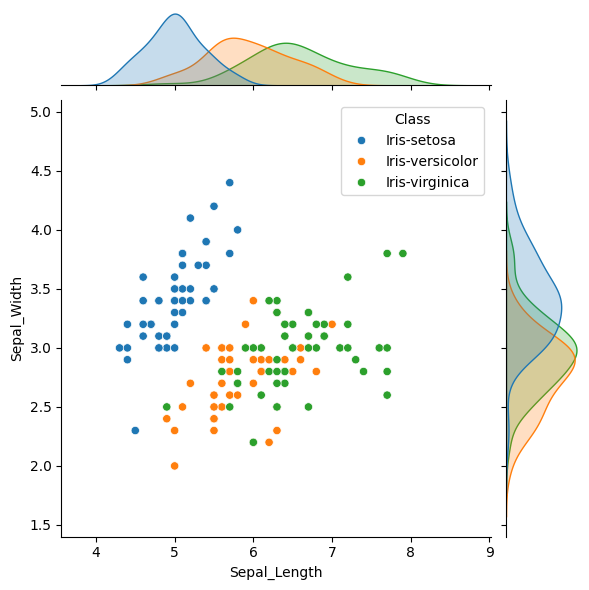

In [39]:
# Cree una gráfica usando joinplot de seaborn para mostrar la dispersión entre la longitud y ancho del sépalo y las distribuciones de estas dos variables.
seaborn.jointplot(data=iris_data, x="Sepal_Length", y="Sepal_Width",hue="Class")
# seaborn.jointplot(data=iris_data, x="PetalLength", y="PetalWidth", hue="Class")
plt.show()


**3.13. Repita el ejercicio anterior, pero esta vez usando joinplot con kind="hex".**

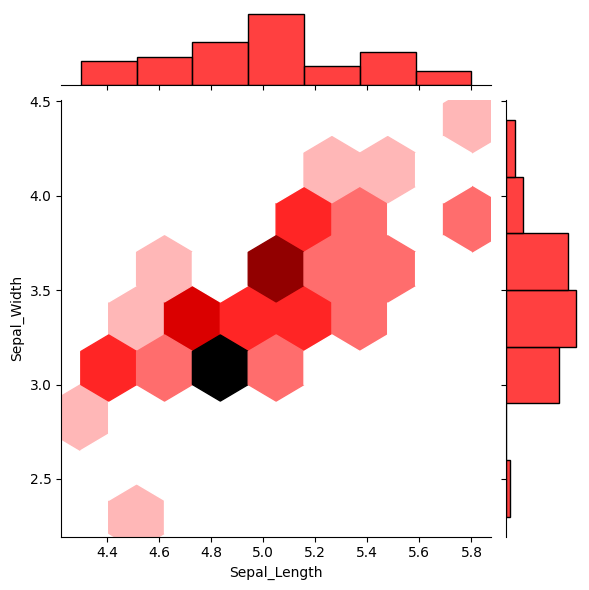

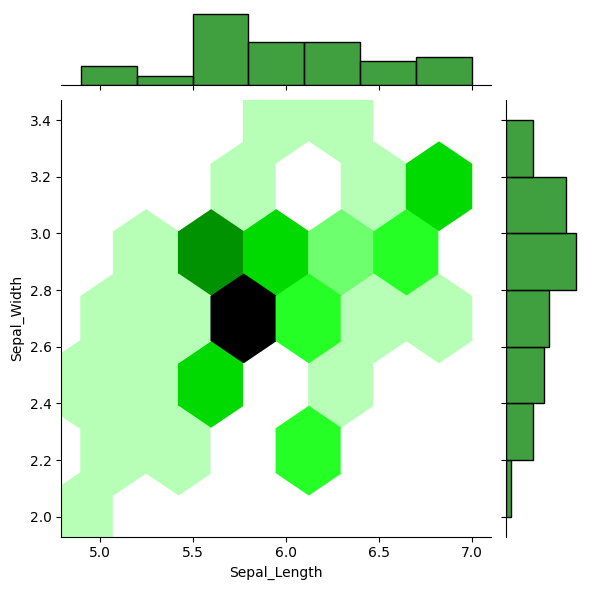

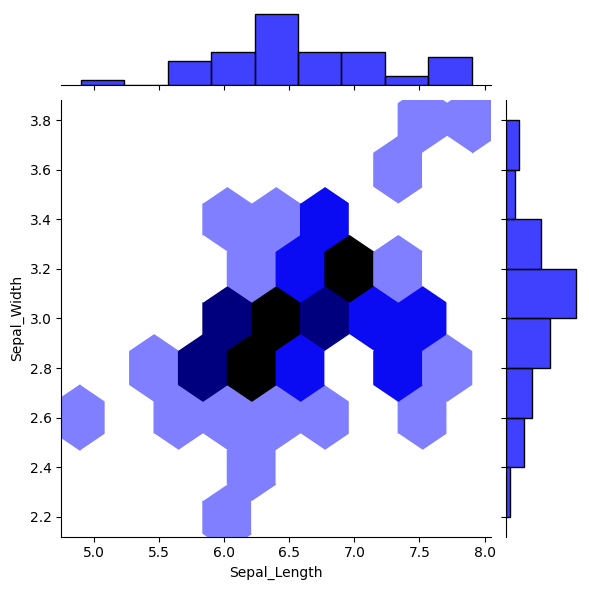

In [40]:
setosa = iris_data[iris_data['Class'] == 'Iris-setosa']
versicolor = iris_data[iris_data['Class'] == 'Iris-versicolor']
virginica = iris_data[iris_data['Class'] == 'Iris-virginica']

sns.jointplot(data=setosa, x="Sepal_Length", y="Sepal_Width", kind="hex", color='r')
sns.jointplot(data=versicolor, x="Sepal_Length", y="Sepal_Width", kind="hex", color='g')
sns.jointplot(data=virginica, x="Sepal_Length", y="Sepal_Width", kind="hex", color='b')

# Mostrar los gráficos
plt.show()

**3.14. Cree un clasificador para reconocer entre las tres especies de iris y muestre los estadísticos resultantes del modelo.**